## IMPORT LIBRARIES

In [1]:
!pip install diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.programming.language import Python
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.aws.network import ELB
from diagrams.aws.compute import EC2
from diagrams.saas.analytics import Snowflake
from diagrams.onprem.workflow import Airflow
from diagrams.programming.framework import FastAPI
from urllib.request import urlretrieve
from diagrams.digitalocean.compute import Docker
from diagrams.onprem.database import Mongodb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 16.7 MB/s eta 0:00:00



Architecture Diagram' size too small for label

Architecture Diagram' size too small for label

Architecture Diagram' size too small for label

Architecture Diagram' size too small for label

Architecture Diagram' size too small for label


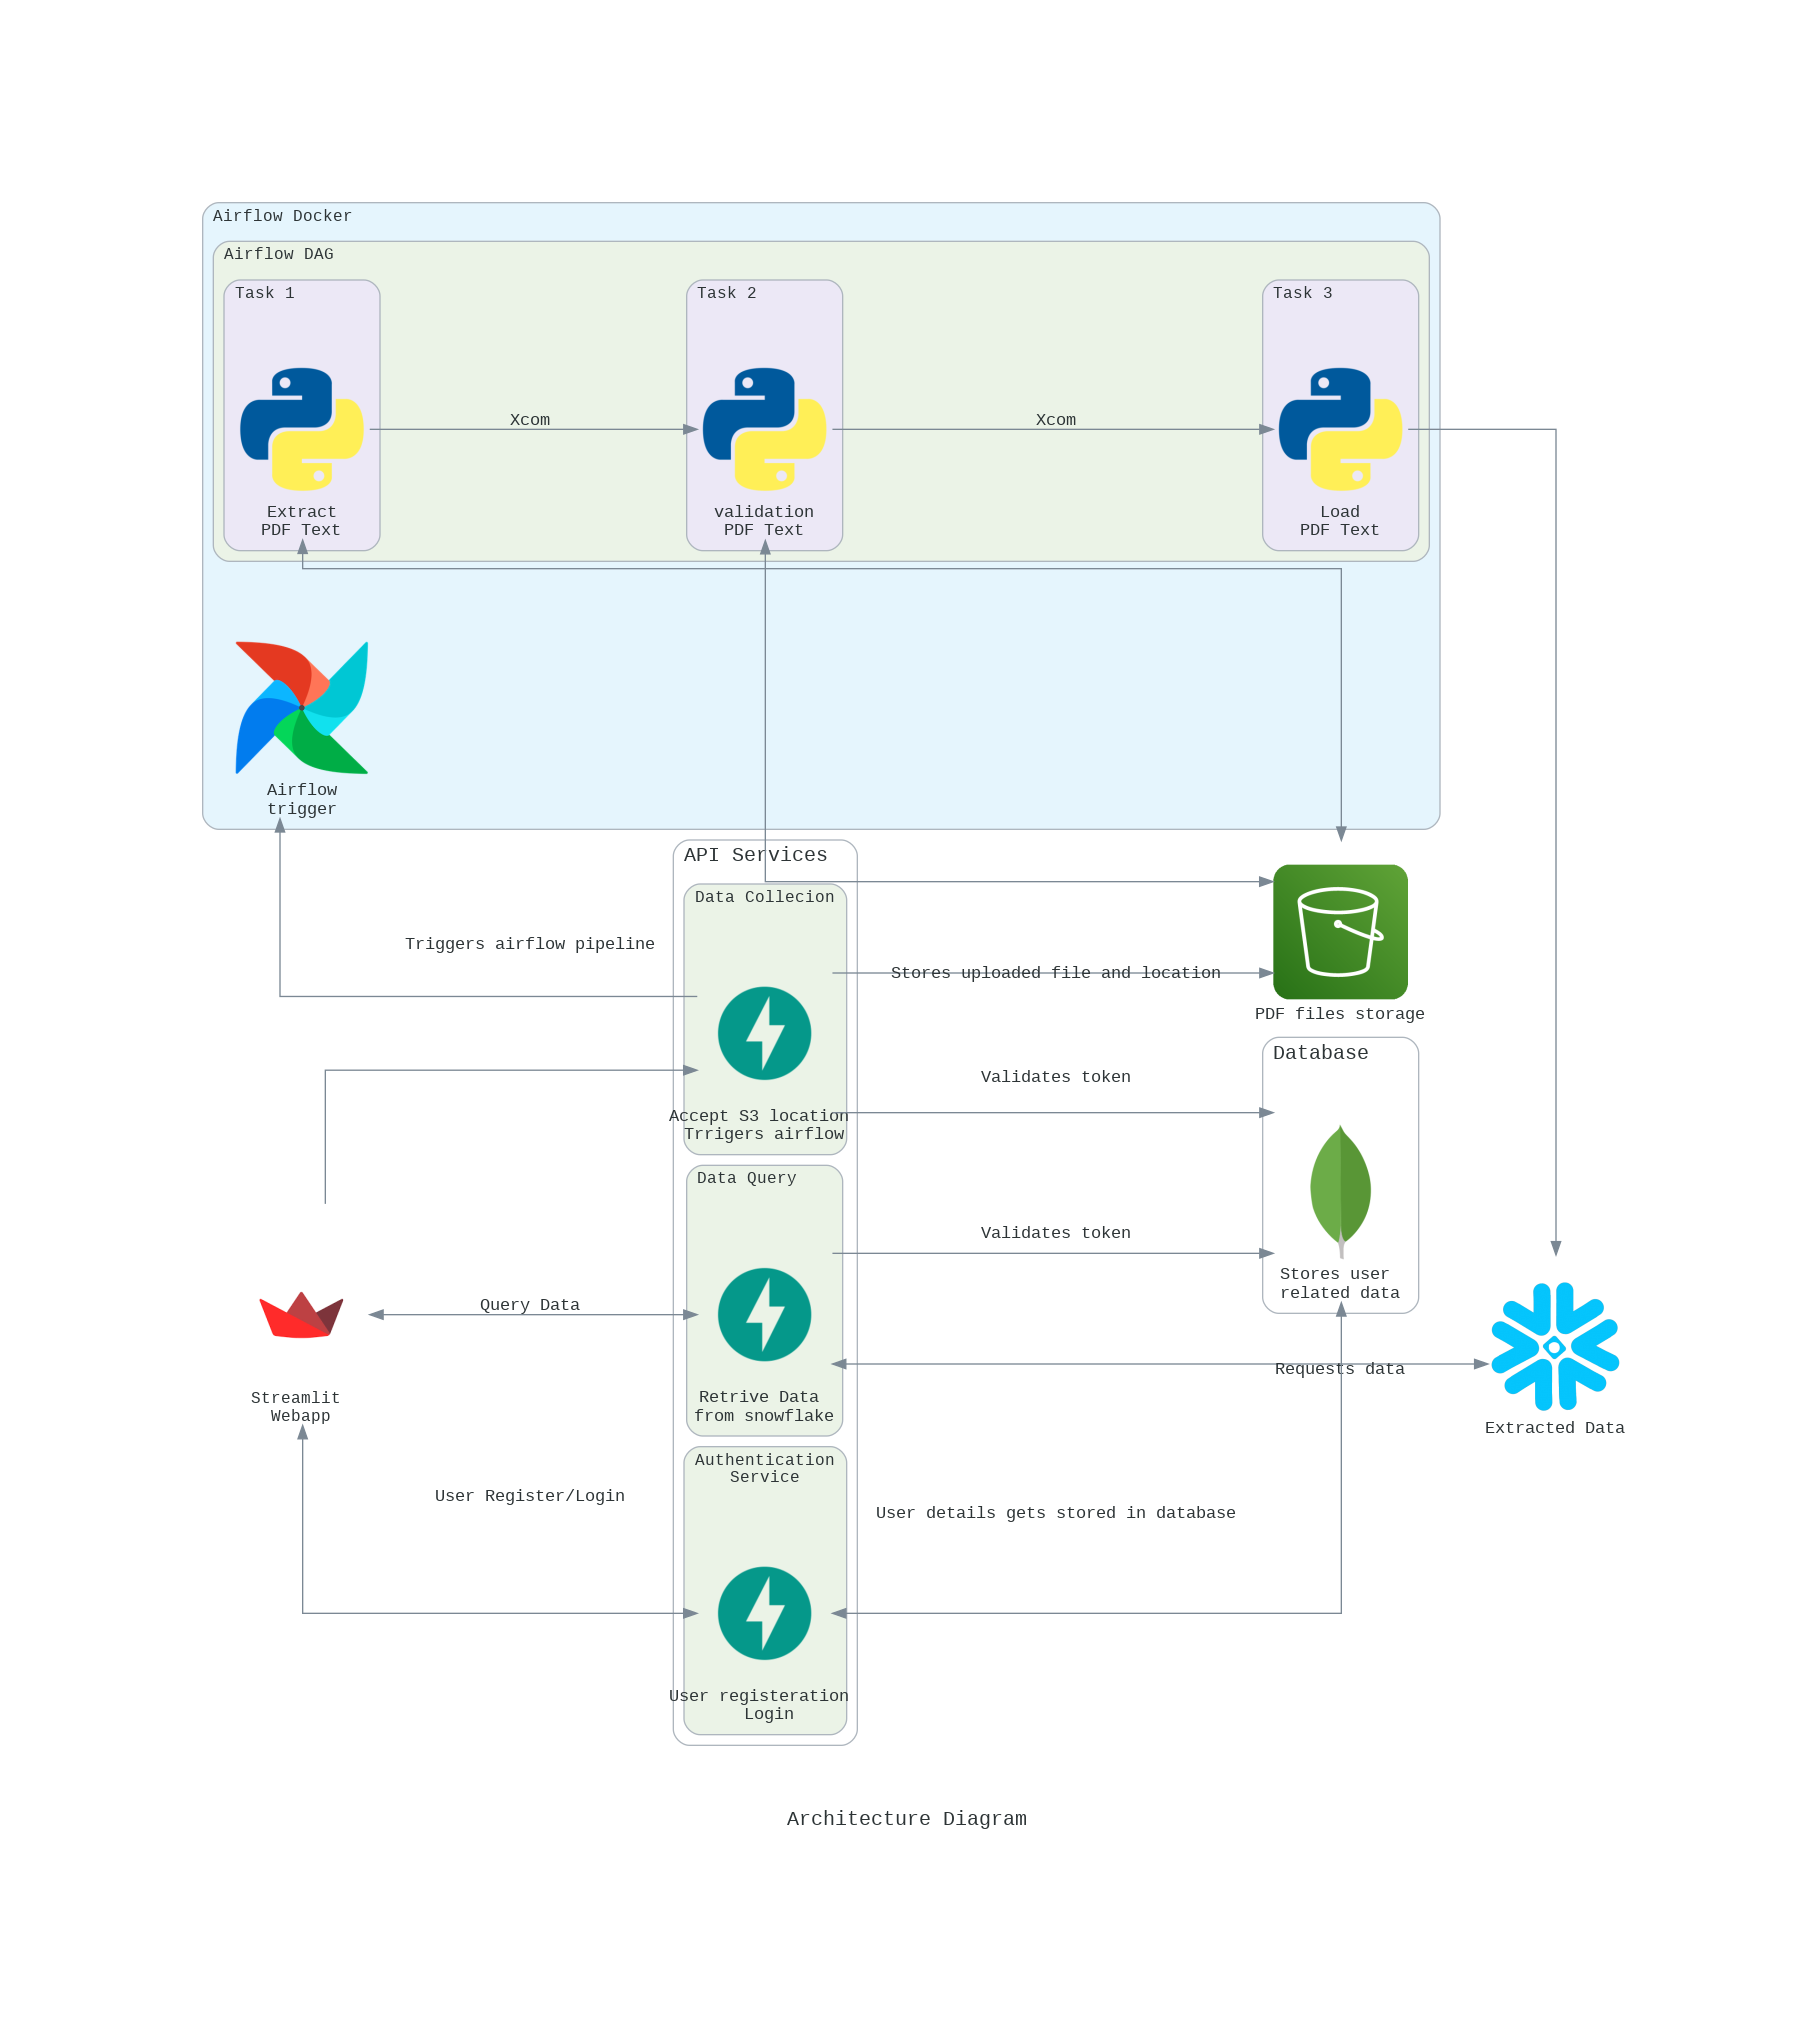

In [2]:
from diagrams import Diagram, Cluster
from diagrams.programming.language import Python

graph_attr = {
  "width": "500",
  "height": "500"
}

cluster_attr = {
    "bgcolor": "white",
    "fontsize":"15"
}

with Diagram("\n\nArchitecture Diagram", show=False, graph_attr=graph_attr, direction="LR") as diag:
    s3 = S3("PDF files storage")
    snowflake = Snowflake("Extracted Data")

    with Cluster("Database", graph_attr=cluster_attr):
      mongodb = Mongodb("Stores user \nrelated data")



    with Cluster("API Services", graph_attr=cluster_attr):
      with Cluster("Data Collecion"):
        fast_api_1 = FastAPI("Accept S3 location \nTrrigers airflow")
      with Cluster("Data Query"):
        fast_api_2 = FastAPI("Retrive Data \nfrom snowflake")

      with Cluster("Authentication\nService"):
        fast_api_3 = FastAPI("User registeration \n Login")

    with Cluster("Airflow Docker"):
      airflow = Airflow("Airflow\ntrigger")


      with Cluster("Airflow DAG"):
        with Cluster("Task 1"):
          py_pdf_extraction = Python("Extract\nPDF Text")
        with Cluster("Task 2"):
          py_pdf_validation = Python("validation\nPDF Text")
        with Cluster("Task 3"):
          py_pdf_load = Python("Load\nPDF Text")

    streamlit_icon = "openstack.png"
    streamlit_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAABI1BMVEX/////Kyq9QUN9NDv9//////3//v3/Kin9Kyu+QEP7/////f98NTt9NTr/Kif/KSu9QUF9ND7BP0P/AAD9Ky57Nju3QUK3QUa8QEX/HRm7PT/BPkX++ff9IyJ8NT6AMzpwHSX9xML+jo53KTDeNjX+nZ7KOzvsMTD/DQ/y09Tjs7Dz3N7Tk5S5ISm7LzTdpqW9UlbShobAMTjWmpXux8j88/r9UFL/panCnaGLVVv+ubP/srHSe3zGqqlwBRjbzMv9ODjVv8OHRkv+aWj/WV/91NWsgof/4uH9c3Hr4N+fcnR0FiL/foOxjZD97vd5IC/LbG6MSFOQXVidZ27+REX/z9CKJi6qOz+TNz3/b2vXNjiNREv/7OjpMTSoeIGLND39h4g2Ebv+AAAJ5klEQVR4nO2ci1/TWBbH87h5tk3SNA1JmpBCBINKd9xVQaorClifg45lYJi6O///X7HnpoW+kjYU0s7yOV8+oJ9KIb+cc8/r3sgwCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIKsFEEUCcOQVV9GgRCiMoJA7rFEkdl59Jgh4qqvo0Ce7LZ2/8Goq76MYhDBO3d2FU7ZBSsK99FRQZTveI7heL8IJSKs+nKKQGCetpSGrRitJxBz7qFEgUl8VDEMs/X4/mUMmgV9x+D6eL8w9y5jqKDx6T+5K1r/un9GZMizlqFcKTQgnt431OceRJlrhd7a3zDSCIKgEkZcqB4RVOapxw2BYPME/HQhldS9S4u9dQ4i1JRQOi/47mctZVQhpIzHcJ2LXQd8KSShErL5Yk9UF6q4wEcNblShbXqOsKAhxP2X+wu9cS4HtSDW24vFwFeeM6rQUTin9XSh+pS8DqPo328Wuop57LmsFcSHByqtSMTcVycI1EdNbhJndwfWdX6RhP4g5m29yfN8820RyUbt1WRLloK4u6FCzMl/aSLkek8xpiSaEE9vcKGJvnfNKgjkT/0iOrASOQo0VpZZrXZ8QvKvdIgMryAVTilsGOCnN6htCPPmHdivAgKj94U0YAI5iy1W0llZC2pHnRvcfYijjjGl0OCM1s4Nfv/HH5/DSrlMFX5+wxSRLsBsrKVZMksJah96cPvJXDcjhPhjiWIUz5n/A+g6BjUfP32O+D7Vyrs7kjT1q8imK+uJQI3VXfdLj0acOfcSBHzzshRy3tMcKxG+4+P7a308X26+viNFE4CUXtwXSG0paYG75c9ZRvCvKtSjTpZCY3cnh7f7X5tRfX2o8NS/I0kTiBBBjwOLHRhR1iXWDfb8mUuelNRfW56SaUNO4eZerbB/GvHr1fBaYfTp7kRNsREP1uEALdagBBCgWE03pkBzfaY8qtCjeT/V00vJGhX2o4gfqqM0i0n3fUiga6MKdUtzLapRSB8tlaBnmimwH08zPBVefl2FBFEujwoM/yxQIEM2g3GFmiZrUAKQjPwo+K3pTD+u0Wj46e8lNMGflkMw4JjCqKA400ft1PRRhbJm6awexC9OMswwI45SHNNxWq8yctub780wrFT4CZq/FjkfEMiLgE0hiI87NGGqE9f6qOXMVEhp7O6Al4+8ExwCJLz5rRmWJ9VV1sPoR6EDECIexGkKLShz/ugx4xWAwPie15jjpRzN+2M7GclfoYCJ+HI4qZDn1yHOFDriISVXS5Uog69+SEqAq28Fq3xrGeZ8hQb46Ugspgn+0ynP18vTNuTD+rpQ6MAcbvYXN02hpLGSHLib/rBDFplHuw6Xne2vBYLEZ6MTYv99MworYZiisBxGX5lSkdsecPs6Nc1KNSPV6Qa0zBH66aM3M1GM+alJ8z4hIuRA/+tpNBVdhgqbHwuU19dIukGmQjAllDlwi5PW9tvMXD8G+GkpcT2a4OvVLIF8PXpZtEDo9tqxniWQ1WVdi+WDZJ/30Yx6dMpTd58lBQwk+Ap453qmxObbgvXBOhR8V5KzFMo6/aAlANNL63ozFSZ++hYKmGqVr0/nwGuiZWyuki+BlGnEPlACnIGPQsVNP/KgeK+gg89WdiXw6xIEMsxJbY5AQHPlbVsxFM6er44KhOLt92pa/hvntPA4QyFMNzPSXHsrFflwe81WzFw2VKhHV/jsENMnfLmkgxx7qSlxDN2COof92bDt6TFiCrbpKN45P89Lm6/JYrsKN0R4HktQc893VUgeD8w1g8sXcQzzor5emeGo5cppaSk2JCLzB5TfVg6F4KryA89WcmYNha+H5XqmQDpEXA4C2YhZKZdCSZZZ6zJfXjRt87xe52cYsdDmfhSRECuXkwI6VAeadbmWx0u5hnFRr2auxbD+5xI3jrdcNruwSfFVqlHh5sdVp1LPVFgtaoiYBunFOW145a3S4baTYz0q59MN07XCooaI6RwFmZVbukKNpsccrnqRKTH6tMzTDRBrbqRQl1ldkx5uz6twFNPJ9NKim/txBEa7yTq8tuRPc41zbCNzPUK0OV+vTLcWlTo098uTRyGb8+uaNI36T9OeUQCAdudivTxtxzJ/us8s89AmNPA5yu8UhZAhHyhr2THVhIAbpiX9MjT3yzygQkjGWHEOlqzroDG741AMQ7FTmvx69Fux85kUiQdxvrotzZLapW1DuZoxSzUvylCfjqmsVAtv7qcECkKgLRJtBp2VdemkbAv3zWg3KtWJWTcU5Es+Q0Xodmmg3ShjjEq0JB1SR3oBYDSU83p5opNaUnM/RBRKTKe2qJvKEG8gPz7cTpXoGA6tT8e8tPp5Kc39BGp3kVgzKpTasaFAdJnukifiafRyqYF0AGnH8yZSs5HopMOzYTlOhVblfHxH7fTtKs6jkucLJf2hCWVJkzVa5jhTIccGPx2zob8ShcyXW7mppFvJBFl6MB1TIZWMdsLQ3K/kSDE5qdEjUrdFhtTBOY4zuhgNZViflquV5uMc524KECiS+WPFPEBnJV96tB4fnpLmhvVpuRp+Z8gqTr4LYp6xYg50K5nm2M7YejTN8GrwVuzO/QwI49du76SsTudVsiRRjUN9EGHP+/VpOYyW2tyPa/wQsHegcQDtkOmkw+ESWyomxFOoT8PoPysTyDBnN5zXzMKS6BQAUodxdYaqAfKg9/28rCFiGuTwdkl/FF3XIUNCKWc3+lmfM88rdH76faVPn2y5C/UXaSTeAPXqT2/NGEhM6tNofxUV2xVqL/XwyS35adrQQ5mGYjj/rfPN1cUZCjm6Zfk9DaxHFsochYP0oazVox8rFajSLYy7R9b1S1tp0AdPLpa2WZGOwJC8Oxg3QJdhPcqQHhX4uFjt4+0qIXsx3Q4tAChXbc7YfbQ6dRSBEcVucPdWpECdc7jtfVutQPAflel17zDtj6BpuhYfiSt+ElMtERGa/cNa7LpBoN1R+pckLQhcN47l9t/lUVO1t9He+nLUlWIAtPaTNw0YMk3kdJuU7jdq/ddl+kpyMyT6J9yXpGqQWXr8nwqLpe7xX1vtjc6qdY2iJscnVb8DUv866gZuLZFK7QqNA63I6OcA+oos60lHIVtgr8RiNZftHoGws45foj+MrKTrzYYMviTXpjJ+56y9t/nhuGtRm8R9244SX73uHnaPP2zuHYCwRNRAVfKkyt9IYSJt8EgCPfFCdxjUZHuDIX6vc3K2cdBu7+1tXbPXbh9snJ10ej59C+nbSyQitNWqMFAn/r/8rwSkL2D42T/HzQxeQBAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRBkFfwPFgzq/Y3UEP8AAAAASUVORK5CYII="
    urlretrieve(streamlit_url, streamlit_icon)
    streamlit_app = Custom("Streamlit \nWebapp", streamlit_icon, edge_label=" ", fontsize="12")


    py_pdf_extraction >> Edge(label = "") << s3
    py_pdf_validation >> Edge(label = "") << s3

    fast_api_1 >> Edge(label = "Validates token") >> mongodb
    fast_api_2 >> Edge(label = "Validates token") >>mongodb

    fast_api_1 >> Edge(label = "Triggers airflow pipeline") >> airflow

    streamlit_app >>  fast_api_1

    streamlit_app >> Edge(label = "Query Data") <<fast_api_2

    fast_api_1 >> Edge(label = "\nStores uploaded file and location") >>  s3
    py_pdf_extraction >> Edge(label = "Xcom") >> py_pdf_validation >> Edge(label = "Xcom") >> py_pdf_load
    py_pdf_load >> snowflake

    snowflake >> Edge(label = "Requests data") << fast_api_2


    streamlit_app >> Edge(label = "User Register/Login") << fast_api_3

    fast_api_3 >> Edge(label = "User details gets stored in database") << mongodb

diag

